In [1]:
import pandas as pd
import numpy as np

In [4]:
rankers = [
    "random",
    "tracing",
   "MF",
  "sib_ranker"]

N=50000 #Number of individuals
T=100 #Total time of simulations
seed = 1 #random seed
n_seed_infection = 10 #number of patient zero
adoption_fraction = 1 #app adoption (fraction)
num_test_random = 0 #number of random tests per day
num_test_algo = 200 #number of tests using by the ranker per day
fraction_SM_obs = 0.5 #fraction of Symptomatic Mild tested positive
initial_steps = 10
ress = {}
for s in rankers:
    
    name_file_res ="../../output/" + s + f"_N_{N}_T_{T}_obs_{num_test_algo}_SM_obs_{fraction_SM_obs}_seed_{seed}"

    ress[s] = pd.read_csv(name_file_res + "_res.gz")

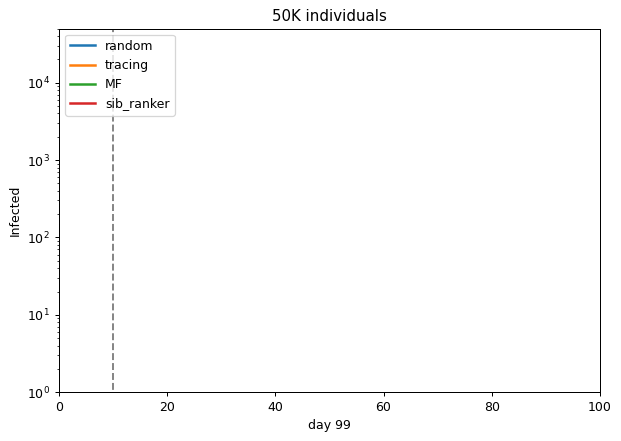

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as anim

fig, ax = plt.subplots(figsize=(7,5),dpi=90)
fig.set_tight_layout(True)
#fig.set_figheight(4)
#fig.set_figwidth(6)
# print('fig size: {0} DPI, size in inches {1}'.format(fig.get_dpi(), fig.get_size_inches()))

lines = {}
for r in rankers:
    lines[r], = ax.plot([], [], lw=2, label=r)

plt.legend(loc="upper left")
plt.ylabel("Infected")

ax.set_yscale("log")
ax.set_xlim(0, T)
ax.set_ylim(1, 50000)

plt.vlines(x=initial_steps, ymin=0, ymax=50000, ls='--', alpha=0.5)

x_data = []
      
def init():
    for r in lines:
        lines[r].set_data([], [])
    return lines,


def animate(t):
    label = 'day {0}'.format(t)
    
    ax.set_xlabel(label)
    x_dat = [i for i in range(t)]
    for r in rankers:
            
        my_y_data = ress[r]["I"][:t]
        lines[r].set_data(x_dat, my_y_data)
        #axis_all[i][alg].set_data(x_dat, my_y_data)

    
animat = FuncAnimation(fig, animate, init_func=init, frames=np.arange(0, T, 1))

plt.title("50K individuals")
writer = anim.PillowWriter(fps=10)
animat.save("anim_50K_log.gif", writer=writer)